# Hydrogen and Oxygen Production Analysis using Python

This notebook performs exploratory data analysis (EDA) on hydrogen and oxygen
production data obtained from Kaggle. The goal is to understand production
trends over time and analyze the relationship between hydrogen and oxygen output.


##  Dataset Overview

The dataset contains time-based production values for:
- Hydrogen (H2)
- Oxygen (O2)
- Combined H2–O2 production volume

The data is used to study production trends and basic process behavior.


## Data Loading and Initial Inspection

In this section, the dataset is loaded using pandas and basic inspection
is performed to understand the structure, columns, and data types.


In [21]:
# Load required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("H2_O2_production.csv")

# Display 
df

,Unnamed: 0,Time,H2_O2_Real_Volumen_Production,H2_Real_Volumen_Production,O2_Real_Production
0,1,08:30:00,0.332963,0.22,0.110988
1,2,09:30:00,0.523560,0.35,0.174520
2,3,10:30:00,0.837989,0.56,0.279330
3,4,11:30:00,0.626043,0.42,0.208681
4,5,12:30:00,1.083424,0.72,0.361141
5,6,13:30:00,1.391466,0.93,0.463822
6,7,14:30:00,1.951854,1.30,0.650618
7,8,15:30:00,1.085384,0.72,0.361795
8,9,16:30:00,0.623182,0.42,0.207727
9,10,17:30:00,0.407997,0.27,0.135999


In [3]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     11 non-null     int64  
 1   Time                           11 non-null     object 
 2   H2_O2_Real_Volumen_Production  11 non-null     float64
 3   H2_Real_Volumen_Production     11 non-null     float64
 4   O2_Real_Production             11 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 572.0+ bytes


In [4]:
df.describe()

,Unnamed: 0,H2_O2_Real_Volumen_Production,H2_Real_Volumen_Production,O2_Real_Production
count,11.000000,11.000000,11.000000,11.000000
mean,6.000000,0.822416,0.548182,0.274139
std,3.316625,0.522021,0.347960,0.174007
min,1.000000,0.182715,0.120000,0.060905
25%,3.500000,0.465778,0.310000,0.155259
50%,6.000000,0.626043,0.420000,0.208681
75%,8.500000,1.084404,0.720000,0.361468
max,11.000000,1.951854,1.300000,0.650618


## Data Cleaning

An extra index column from the dataset is removed.
The dataset does not contain missing values, so no further cleaning is required.


In [6]:
# To check whether the dataset contains any empty sets.
df.isnull().sum()


Unnamed: 0                       0
Time                             0
H2_O2_Real_Volumen_Production    0
H2_Real_Volumen_Production       0
O2_Real_Production               0
dtype: int64

In [ ]:
# To remove the extra column 
df = df.drop(columns=['Unnamed: 0'])

In [9]:
df

,Time,H2_O2_Real_Volumen_Production,H2_Real_Volumen_Production,O2_Real_Production
0,08:30:00,0.332963,0.22,0.110988
1,09:30:00,0.523560,0.35,0.174520
2,10:30:00,0.837989,0.56,0.279330
3,11:30:00,0.626043,0.42,0.208681
4,12:30:00,1.083424,0.72,0.361141
5,13:30:00,1.391466,0.93,0.463822
6,14:30:00,1.951854,1.30,0.650618
7,15:30:00,1.085384,0.72,0.361795
8,16:30:00,0.623182,0.42,0.207727
9,17:30:00,0.407997,0.27,0.135999


# Plot Hydrogen & Oxygen production vs Time

## Exploratory Data Analysis (EDA)

Exploratory analysis is performed to visualize hydrogen and oxygen production
trends over time and to compare individual gas production with total output.


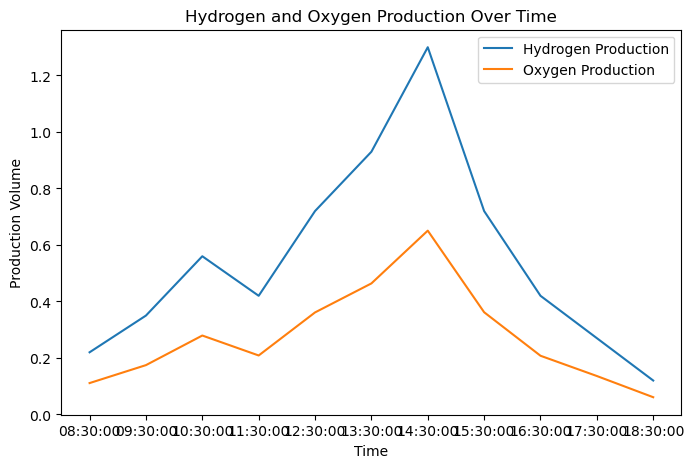

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df['Time'], df['H2_Real_Volumen_Production'], label='Hydrogen Production')
plt.plot(df['Time'], df['O2_Real_Production'], label='Oxygen Production')
plt.xlabel('Time')
plt.ylabel('Production Volume')
plt.title('Hydrogen and Oxygen Production Over Time')
plt.legend()
plt.show()

### Total production vs time

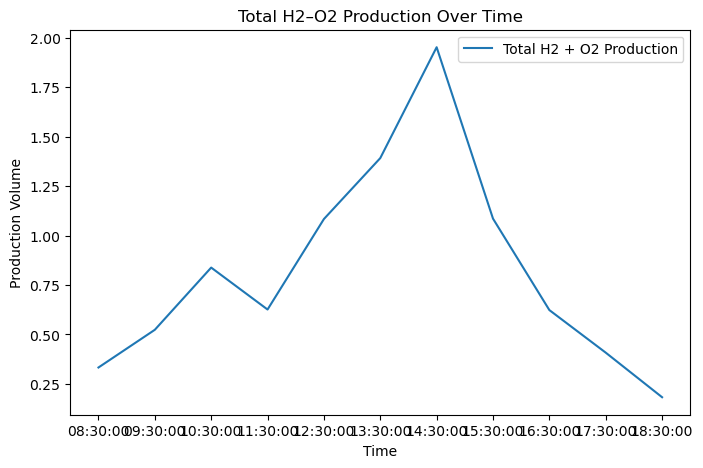

In [12]:
plt.figure(figsize=(8,5))
plt.plot(df['Time'], df['H2_O2_Real_Volumen_Production'], label='Total H2 + O2 Production')
plt.xlabel('Time')
plt.ylabel('Production Volume')
plt.title('Total H2–O2 Production Over Time')
plt.legend()
plt.show()


## ENGINEERING METRIC

Oxygen to Hydrogen Production Ratio

A simple production ratio (O2/H2) is calculated to understand the relative
behavior of oxygen and hydrogen generation over time.


0     0.504490
1     0.498629
2     0.498803
3     0.496860
4     0.501585
5     0.498733
6     0.500475
7     0.502492
8     0.494589
9     0.503700
10    0.507542
Name: O2_to_H2_Ratio, dtype: float64


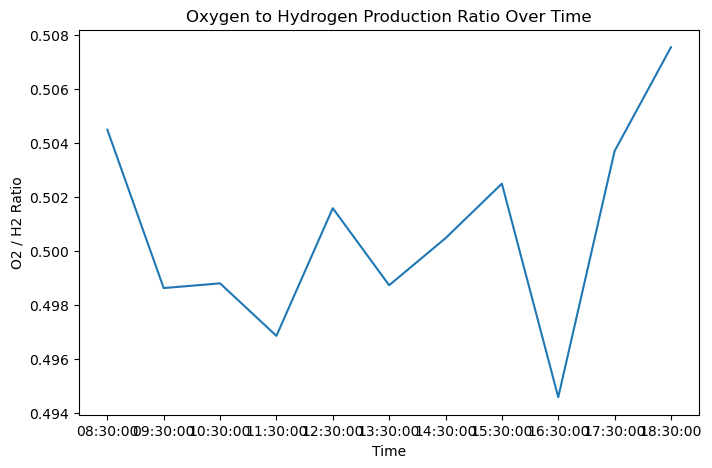

In [17]:
# Oxygen-to-Hydrogen ratio
df['O2_to_H2_Ratio'] = df['O2_Real_Production'] / df['H2_Real_Volumen_Production']
df['O2_to_H2_Ratio'].describe()

print(df['O2_to_H2_Ratio'])
# plotting
plt.figure(figsize=(8,5))
plt.plot(df['Time'], df['O2_to_H2_Ratio'])
plt.xlabel('Time')
plt.ylabel('O2 / H2 Ratio')
plt.title('Oxygen to Hydrogen Production Ratio Over Time')
plt.show()


## Key Insights

- Hydrogen and oxygen production show consistent trends over time
- Total H2–O2 production closely follows individual gas outputs
- The O2 to H2 production ratio remains relatively stable, indicating steady process behavior
